#AIRBNB DATA ANALYSIS


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("/content/compressed_data AIRBN.csv")
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


#Check the column names in the Dataset

In [32]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

#Check the Missing Values

In [33]:
print(df.isnull().sum())

id                                   0
NAME                                58
host id                              0
host_identity_verified              73
host name                           20
neighbourhood group                 27
neighbourhood                       16
lat                                  8
long                                 8
country                             50
country code                        79
instant_bookable                    79
cancellation_policy                 50
room type                            0
Construction year                  135
price                               11
service fee                         15
minimum nights                      84
number of reviews                    7
last review                        450
reviews per month                  436
review rate number                  93
calculated host listings count      23
availability 365                   148
house_rules                       1521
license                  

#Handling Missing Values

In [34]:
df['last review'] = pd.to_datetime(df['last review'],errors='coerce')

df.fillna({'reviews per month':0,'last review': df['last review'].min()},inplace=True)

df.dropna(subset=['NAME','host name'],inplace=True)

In [35]:
print(df.isnull().sum())

id                                   0
NAME                                 0
host id                              0
host_identity_verified              63
host name                            0
neighbourhood group                 24
neighbourhood                       16
lat                                  8
long                                 8
country                             44
country code                        70
instant_bookable                    70
cancellation_policy                 44
room type                            0
Construction year                  122
price                               11
service fee                         15
minimum nights                      78
number of reviews                    6
last review                          0
reviews per month                    0
review rate number                  81
calculated host listings count      22
availability 365                   120
house_rules                       1503
license                  

#Change Datatype

In [36]:
df['price'] = df['price'].replace('[\$,]','',regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]','',regex=True).astype(float)

#Remove Duplicates

In [37]:
df.drop_duplicates(inplace=True)

#Confirme Data Cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4717 entries, 0 to 4788
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4717 non-null   int64         
 1   NAME                            4717 non-null   object        
 2   host id                         4717 non-null   int64         
 3   host_identity_verified          4654 non-null   object        
 4   host name                       4717 non-null   object        
 5   neighbourhood group             4693 non-null   object        
 6   neighbourhood                   4701 non-null   object        
 7   lat                             4709 non-null   float64       
 8   long                            4709 non-null   float64       
 9   country                         4673 non-null   object        
 10  country code                    4647 non-null   object        
 11  instant_b

In [39]:
df = df.drop(columns=["license","house_rules"],errors="ignore")

#Descriptive Statistic's

In [40]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,4.717000e+03,4.717000e+03,4709.000000,4709.000000,4595.000000,4706.000000,4702.000000,4639.000000,4711.000000,4717,4717.000000,4636.000000,4695.000000,4597.000000
mean,2.340742e+06,4.845088e+10,40.728785,-73.961150,2012.354298,619.646834,123.794130,10.702738,57.219911,2017-11-23 19:55:09.985159936,0.817250,2.995039,2.481576,208.190559
min,1.001254e+06,1.316021e+08,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.690606e+06,2.388461e+10,40.688880,-73.984540,2007.000000,328.000000,66.000000,2.000000,6.000000,2016-09-25 00:00:00,0.100000,2.000000,1.000000,99.000000
50%,2.341768e+06,4.755329e+10,40.723000,-73.960870,2012.000000,621.000000,124.000000,3.000000,24.000000,2019-02-19 00:00:00,0.370000,3.000000,1.000000,208.000000
75%,2.994034e+06,7.305701e+10,40.762540,-73.945320,2017.000000,909.000000,182.000000,6.000000,79.000000,2019-06-18 00:00:00,1.150000,4.000000,2.000000,318.000000
max,3.645748e+06,9.872629e+10,40.908040,-73.733230,2022.000000,1200.000000,240.000000,3455.000000,607.000000,2058-06-16 00:00:00,10.000000,5.000000,52.000000,426.000000
std,7.554538e+05,2.844024e+10,0.051190,0.035403,5.782278,333.736628,66.720632,59.225851,76.573637,NaN,1.063027,1.419458,6.240701,125.830226


#Visulization
#Destribution of Prices

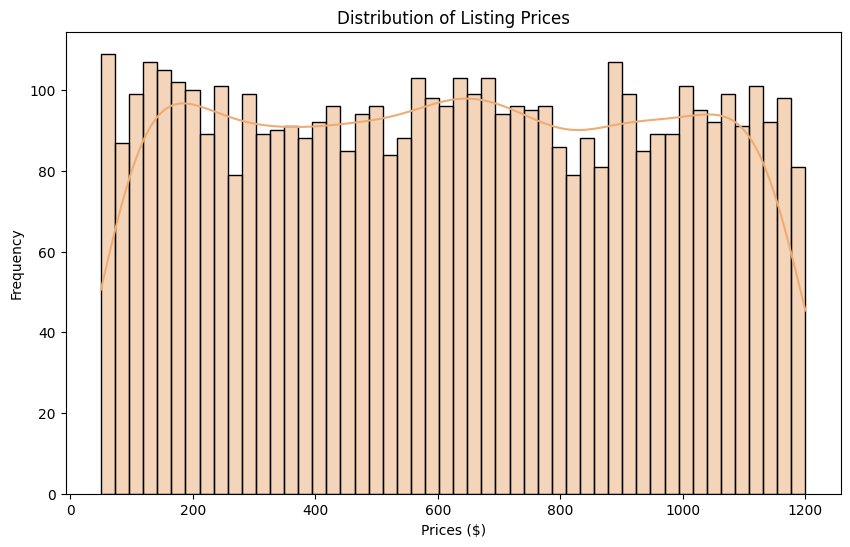

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df["price"],bins=50,kde=True,color="#EDAC74")
plt.title("Distribution of Listing Prices")
plt.xlabel("Prices ($)")
plt.ylabel("Frequency")
plt.show()

#Room Type Analysis
#Analyze the Distribution of different room types


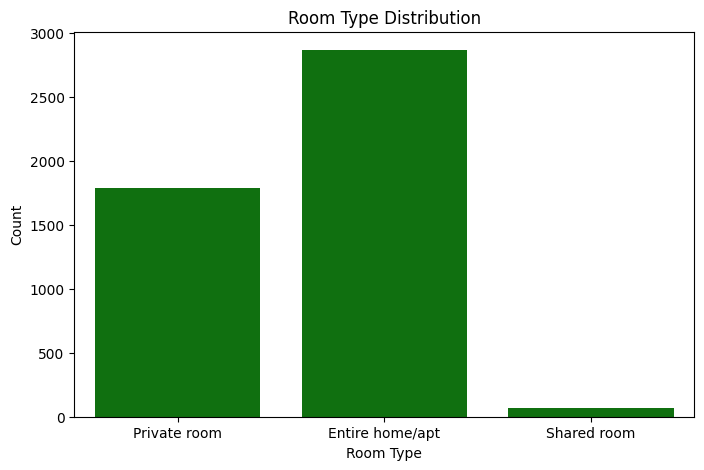

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x="room type",data=df,color="Green")
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

#Neighborhood Analysis
#Examine How Listings are distributed across different neighborhoods

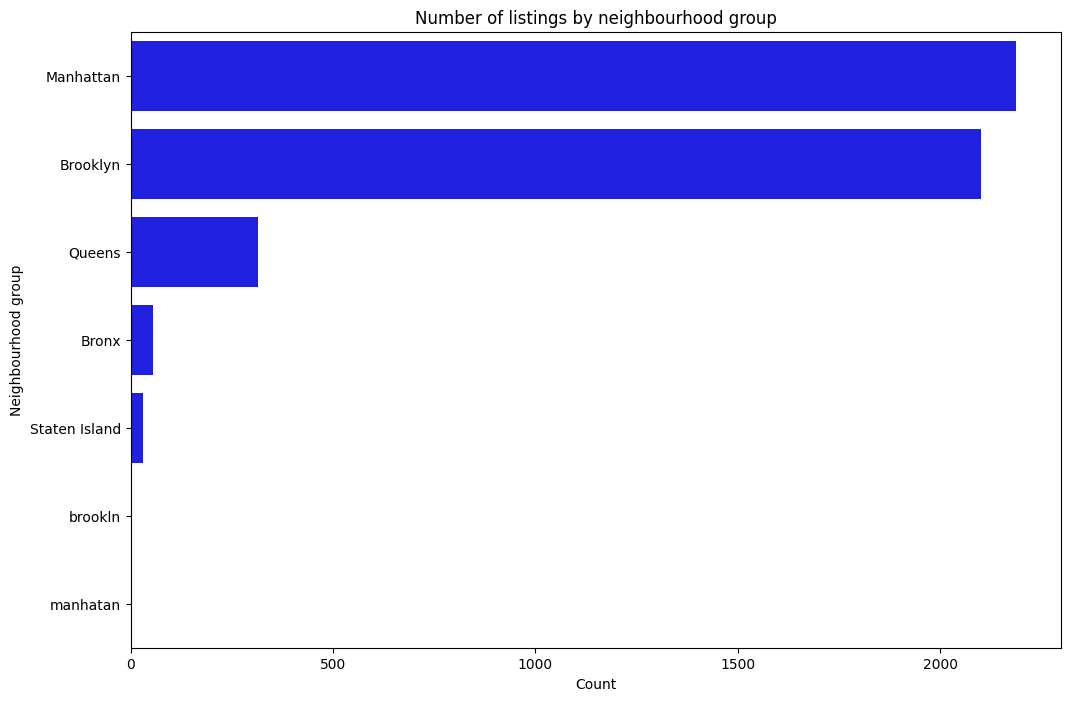

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(y="neighbourhood group",data=df,color="Blue",order=df["neighbourhood group"].value_counts().index)
plt.title("Number of listings by neighbourhood group")
plt.xlabel("Count")
plt.ylabel("Neighbourhood group")
plt.show()

#Price Vs Room Type
#Visulization for the Relationship between Price and Type

/tmp/ipython-input-3436874940.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Room Type")


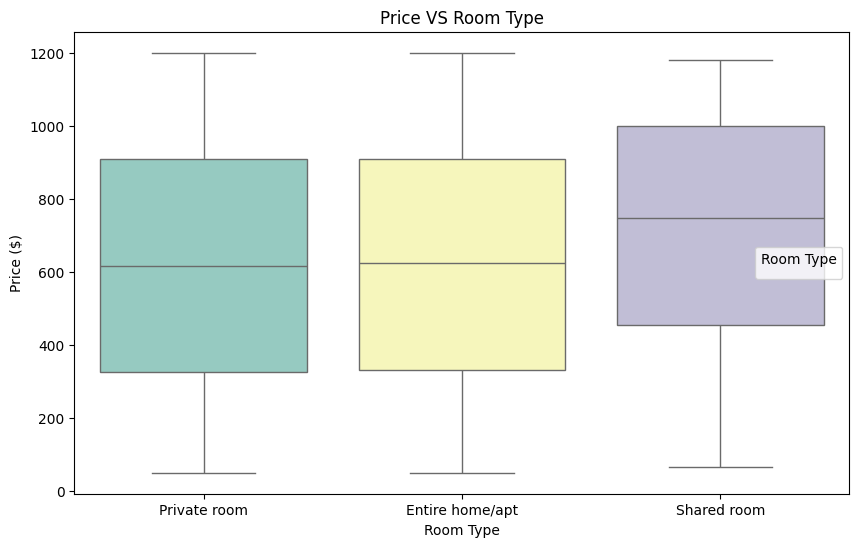

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x="room type",y="price",hue="room type",data=df,palette="Set3")
plt.title("Price VS Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.legend(title="Room Type")
plt.show()

#Revies Over Time

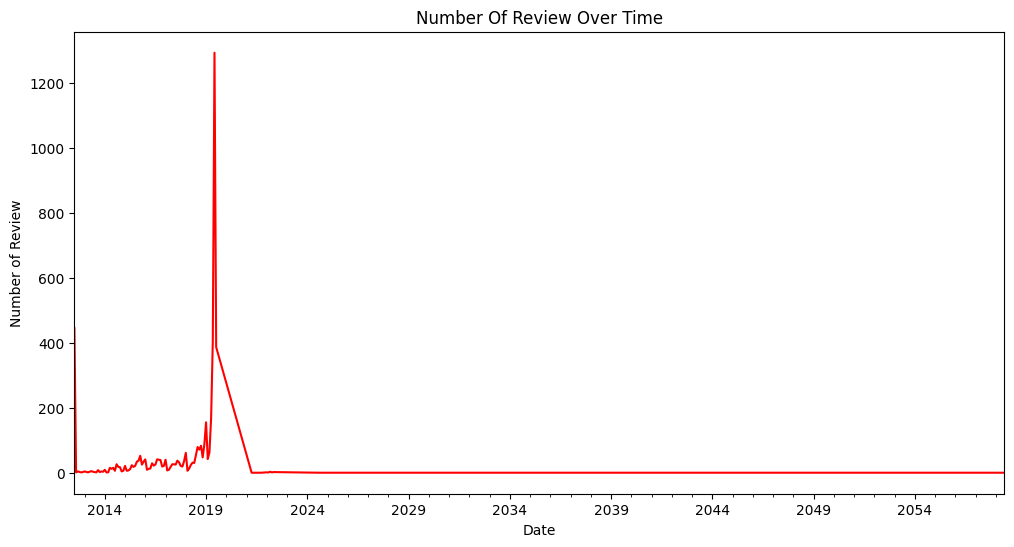

In [45]:
df["last review"] = pd.to_datetime(df["last review"])
review_over_time =df.groupby(df["last review"].dt.to_period("M")).size()

plt.figure(figsize=(12,6))
review_over_time.plot(kind="line",color="red")
plt.title("Number Of Review Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Review")
plt.show()